### Prepare and visualise transients
This prepares and visualises the transient sea level rise scenarios spanning the uncertainty space of the different SLR projections.

In [1]:
import sys
sys.path.append("..") #import folder which is one level higher

import matplotlib.pyplot as plt
import os
import pandas as pd

#import self-made classes
from classes import SLR_Scenario, SurgeHeight

#### Prepare existing SLR projections

In [2]:
SLR_path = os.path.join('','..','SLR_projections')
#Load the SLR projections
# Load all SLR_Scenario
all_scenarios = []
for filename in os.listdir(SLR_path):
    if filename.endswith(".csv"):
        obj = SLR_Scenario(filename.split('.')[0]) #Init object with name derived from filename
        filepath = os.path.join(SLR_path,filename)
        obj.from_csv(filepath) #Fill the object with data from the csv file
        all_scenarios.append(obj)
        
#Add parts of the name as attributes
authors = ['LeBars','SROCC','Bamber']
RCPs = ['RCP26','RCP45','RCP85']
for scenario in all_scenarios:
    scenario.author = scenario.name.split('_')[0]
    scenario.rcp = scenario.name.split('_')[2]
    scenario.prob = scenario.name.split('_')[3]
    
dct = {}
for scenario in all_scenarios:
    dct[scenario.name] = scenario
    print(scenario.name, end = ' ||| ') 

Bamber_2019_high_17 ||| Bamber_2019_high_5 ||| Bamber_2019_high_50 ||| Bamber_2019_high_83 ||| Bamber_2019_high_95 ||| Bamber_2019_low_17 ||| Bamber_2019_low_5 ||| Bamber_2019_low_50 ||| Bamber_2019_low_83 ||| Bamber_2019_low_95 ||| Horton_2020_rcp26_17 ||| Horton_2020_rcp26_5 ||| Horton_2020_rcp26_50 ||| Horton_2020_rcp26_83 ||| Horton_2020_rcp26_95 ||| Horton_2020_rcp85_17 ||| Horton_2020_rcp85_5 ||| Horton_2020_rcp85_50 ||| Horton_2020_rcp85_83 ||| Horton_2020_rcp85_95 ||| LeBars_2017_RCP45_05 ||| LeBars_2017_RCP45_95 ||| LeBars_2017_RCP45_med ||| LeBars_2017_RCP85_05 ||| LeBars_2017_RCP85_95 ||| LeBars_2017_RCP85_med ||| SROCC_2019_RCP26_17 ||| SROCC_2019_RCP26_50 ||| SROCC_2019_RCP26_83 ||| SROCC_2019_RCP45_17 ||| SROCC_2019_RCP45_50 ||| SROCC_2019_RCP45_83 ||| SROCC_2019_RCP85_17 ||| SROCC_2019_RCP85_50 ||| SROCC_2019_RCP85_83 ||| 

### Visualise the available data
SROCC, Bamber, LeBars, Horton, till 2300

Text(0, 0.5, 'Global mean sea level rise rel. to 1995 level (m)')

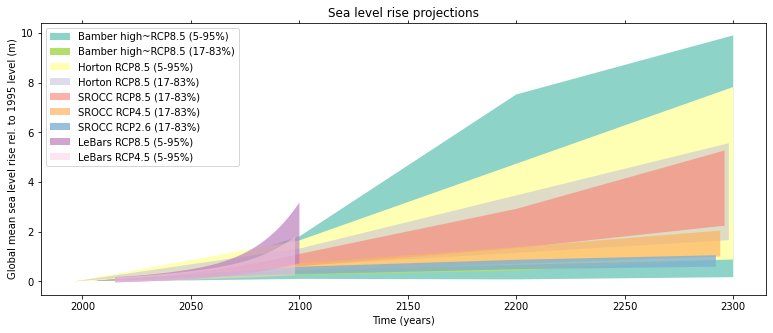

In [3]:
fig, ax1 = plt.subplots(figsize=(13,5))

colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd']

def countdown(counter): #function to regulate 
    return counter - 2

#SEA LEVEL RISE SCENARIOS

counter = 0
ax1.fill_between(dct['Bamber_2019_high_5'].years,dct['Bamber_2019_high_5'].sealevel,dct['Bamber_2019_high_95'].sealevel,label='Bamber high~RCP8.5 (5-95%)',facecolor=colors[0],alpha=1)
counter = countdown(counter)
ax1.fill_between(dct['Bamber_2019_high_17'].years[:counter],dct['Bamber_2019_high_17'].sealevel[:counter],dct['Bamber_2019_high_83'].sealevel[:counter],label='Bamber high~RCP8.5 (17-83%)',facecolor=colors[6],alpha=1)
counter = countdown(counter)


counter = 0
ax1.fill_between(dct['Horton_2020_rcp85_5'].years,dct['Horton_2020_rcp85_5'].sealevel,dct['Horton_2020_rcp85_95'].sealevel,label='Horton RCP8.5 (5-95%)',facecolor=colors[1],alpha=1)
counter = countdown(counter)
ax1.fill_between(dct['Horton_2020_rcp85_17'].years[:counter],dct['Horton_2020_rcp85_17'].sealevel[:counter],dct['Horton_2020_rcp85_83'].sealevel[:counter],label='Horton RCP8.5 (17-83%)',facecolor=colors[2],alpha=0.5)
counter = countdown(counter)

ax1.fill_between(dct['SROCC_2019_RCP85_17'].years[:counter],dct['SROCC_2019_RCP85_17'].sealevel[:counter],dct['SROCC_2019_RCP85_83'].sealevel[:counter],label='SROCC RCP8.5 (17-83%)',facecolor=colors[3],alpha=.6)
counter = countdown(counter)
ax1.fill_between(dct['SROCC_2019_RCP45_17'].years[:counter],dct['SROCC_2019_RCP45_17'].sealevel[:counter],dct['SROCC_2019_RCP45_83'].sealevel[:counter],label='SROCC RCP4.5 (17-83%)',facecolor=colors[5],alpha=.7)
counter = countdown(counter)
ax1.fill_between(dct['SROCC_2019_RCP26_17'].years[:counter],dct['SROCC_2019_RCP26_17'].sealevel[:counter],dct['SROCC_2019_RCP26_83'].sealevel[:counter],label='SROCC RCP2.6 (17-83%)',facecolor=colors[4],alpha=.8)

ax1.fill_between(dct['LeBars_2017_RCP85_05'].years,dct['LeBars_2017_RCP85_05'].sealevel,dct['LeBars_2017_RCP85_95'].sealevel,label='LeBars RCP8.5 (5-95%)',facecolor=colors[-1],alpha=0.7)
ax1.fill_between(dct['LeBars_2017_RCP45_05'].years[:-2],dct['LeBars_2017_RCP45_05'].sealevel[:-2],dct['LeBars_2017_RCP45_95'].sealevel[:-2],label='LeBars RCP4.5 (5-95%)',facecolor=colors[-3],alpha=.5)



ax1.legend(loc='upper left')
ax1.tick_params(axis='x',reset=True)
ax1.set_title('Sea level rise projections')
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Global mean sea level rise rel. to 1995 level (m)')
#fig.savefig('Waterlevel_scenarios_till2300.png',bbox_inches='tight',dpi=150)

### Prepare the new transient scenarios
Starts with LeBars ~ high rate of sea level rise, than follows from 2200 Bamber_2019, high_95
Linear interpolation inbetween 2100-2200

In [4]:
new_scens = [] #list to track all scenario

scenario = [s for s in all_scenarios if s.name == "LeBars_2017_RCP85_95"][0]
part1 = pd.DataFrame(scenario.sealevel,index=scenario.years,columns=['sl']).loc[2020:2100]

scenario = [s for s in all_scenarios if s.name == "Bamber_2019_high_95"][0]
part3 = pd.DataFrame(scenario.sealevel,index=scenario.years,columns=['sl']).loc[2200:2300]

df = pd.DataFrame(index=range(2020,2301),columns=['sl'])

df.loc[2020:2100] = part1
df.loc[2200:2300] = part3
df = df.astype('float')
df.interpolate(method='values',axes='index',inplace=True)

scen1 = SLR_Scenario(name='Scenario_01',years=list(df.index),sealevel=list(df.sl.values))
scen1.description = "LeBars_RCP85_95 till 2100, Bamber_2019_high_95 from 2200 to 2300, inbetween lininterp."

new_scens.append(scen1)
################


Bamber RCP8.5 95

In [5]:
inbetween = list(range(2085,2101)) #inbetween region in which we follow neither LeBars nor Bamber, but linearly interpolate between the two to smooth the signal

scenario = [s for s in all_scenarios if s.name == "LeBars_2017_RCP45_95"][0]
part1 = pd.DataFrame(scenario.sealevel,index=scenario.years,columns=['sl']).loc[2020:inbetween[0]]

scenario = [s for s in all_scenarios if s.name == "Bamber_2019_high_95"][0]
part3 = pd.DataFrame(scenario.sealevel,index=scenario.years,columns=['sl']).loc[inbetween[-1]:2300]

part2 = pd.DataFrame(index=inbetween,columns=['sl'])
part2.loc[inbetween[0]]=part1.loc[inbetween[0]]
part2.loc[inbetween[-1]]=part3.loc[inbetween[-1]]
part2 = part2.astype('float')
part2.interpolate(method='values',axes='index',inplace=True)

df = pd.DataFrame(index=range(2020,2301),columns=['sl'])
df.loc[2020:inbetween[0]] = part1
df.loc[inbetween[0]:inbetween[-1]] = part2
df.loc[inbetween[-1]:2300] = part3

scen2 = SLR_Scenario(name='Scenario_02',years=list(df.index),sealevel=list(df.sl.values))
scen2.description = "LeBars_2017_RCP45_95 till 2085, Bamber_2019_high_95 from 2101 to 2300, inbetween lininterp."

new_scens.append(scen2)

In [6]:
inbetween = list(range(2085,2111)) #inbetween region in which we follow niehter LeBars nor Horton, but linearly interpolate between the two to smooth the signal

scenario = [s for s in all_scenarios if s.name == "LeBars_2017_RCP45_95"][0]
part1 = pd.DataFrame(scenario.sealevel,index=scenario.years,columns=['sl']).loc[2020:inbetween[0]]

scenario = [s for s in all_scenarios if s.name == "Horton_2020_rcp85_95"][0]
part3 = pd.DataFrame(scenario.sealevel,index=scenario.years,columns=['sl']).loc[inbetween[-1]:2300]

part2 = pd.DataFrame(index=inbetween,columns=['sl'])
part2.loc[inbetween[0]]=part1.loc[inbetween[0]]
part2.loc[inbetween[-1]]=part3.loc[inbetween[-1]]
part2 = part2.astype('float')
part2.interpolate(method='values',axes='index',inplace=True)


df = pd.DataFrame(index=range(2020,2301),columns=['sl'])
df.loc[2020:inbetween[0]] = part1
df.loc[inbetween[0]:inbetween[-1]] = part2
df.loc[inbetween[-1]:2300] = part3




scen3 = SLR_Scenario(name='Scenario_03',years=list(df.index),sealevel=list(df.sl.values))
scen3.description = "LeBars_2017_RCP45_95 til 2085, from 2110 Horton_2020_rcp85_95, inbetween lininterp."

new_scens.append(scen3)

In [7]:
inbetween = list(range(2070,2102)) #inbetween region in which we follow niehter LeBars nor Horton, but linearly interpolate between the two to smooth the signal

scenario = [s for s in all_scenarios if s.name == "SROCC_2019_RCP85_83"][0]
part1 = pd.DataFrame(scenario.sealevel,index=scenario.years,columns=['sl']).loc[2020:inbetween[0]]

scenario = [s for s in all_scenarios if s.name == "Horton_2020_rcp85_83"][0]
part3 = pd.DataFrame(scenario.sealevel,index=scenario.years,columns=['sl']).loc[inbetween[-1]:2300]

part2 = pd.DataFrame(index=inbetween,columns=['sl'])
part2.loc[inbetween[0]]=part1.loc[inbetween[0]]
part2.loc[inbetween[-1]]=part3.loc[inbetween[-1]]
part2 = part2.astype('float')
part2.interpolate(method='values',axes='index',inplace=True)

df = pd.DataFrame(index=range(2020,2301),columns=['sl'])
df.loc[2020:inbetween[0]] = part1
df.loc[inbetween[0]:inbetween[-1]] = part2
df.loc[inbetween[-1]:2300] = part3

scen4 = SLR_Scenario(name='Scenario_04',years=list(df.index),sealevel=list(df.sl.values))
scen4.description = "SROCC_2019_RCP85_83 till 2070,from 2102 Horton_2020_rcp85_83, inbetween lininterp."

new_scens.append(scen4)

In [8]:
scenario = [s for s in all_scenarios if s.name == "SROCC_2019_RCP85_50"][0]
df = pd.DataFrame(scenario.sealevel,index=scenario.years,columns=['sl']).loc[2020:2300]

scen5 = SLR_Scenario(name='Scenario_05',years=list(df.index),sealevel=list(df.sl.values))
scen5.description = "SROCC_2019_RCP85_50"

new_scens.append(scen5)

In [9]:
scenario = [s for s in all_scenarios if s.name == "SROCC_2019_RCP85_17"][0]
df = pd.DataFrame(scenario.sealevel,index=scenario.years,columns=['sl']).loc[2020:2300]

scen6 = SLR_Scenario(name='Scenario_06',years=list(df.index),sealevel=list(df.sl.values))
scen6.description = "SROCC_2019_RCP85_17 ~ RCP45_83"

new_scens.append(scen6)

In [10]:
scenario = [s for s in all_scenarios if s.name == "SROCC_2019_RCP45_50"][0]
df = pd.DataFrame(scenario.sealevel,index=scenario.years,columns=['sl']).loc[2020:2300]

scen7 = SLR_Scenario(name='Scenario_07',years=list(df.index),sealevel=list(df.sl.values))
scen7.description = "SROCC_2019_RCP45_50"

new_scens.append(scen7)

In [11]:
scenario = [s for s in all_scenarios if s.name == "SROCC_2019_RCP26_50"][0]
df = pd.DataFrame(scenario.sealevel,index=scenario.years,columns=['sl']).loc[2020:2300]

scen8 = SLR_Scenario(name='Scenario_08',years=list(df.index),sealevel=list(df.sl.values))
scen8.description = "SROCC_2019_RC26_50"

new_scens.append(scen8)

In [12]:
scenario = [s for s in all_scenarios if s.name == "SROCC_2019_RCP26_17"][0]
df = pd.DataFrame(scenario.sealevel,index=scenario.years,columns=['sl']).loc[2020:2300]

scen9 = SLR_Scenario(name='Scenario_09',years=list(df.index),sealevel=list(df.sl.values))
scen9.description = "SROCC_2019_RC26_17"

new_scens.append(scen9)

# New scenarios relating to RCP8.5

Text(0, 0.5, 'Global mean sea level rise rel. to 1995 level (m)')

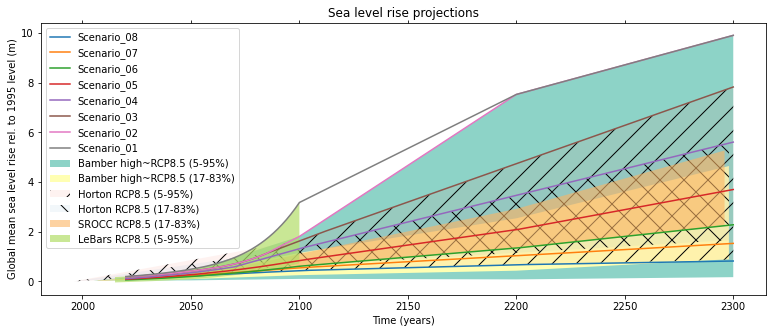

In [18]:
# Only RCP8.5

fig, ax1 = plt.subplots(figsize=(13,5))

colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd']

def countdown(counter): #function to regulate 
    return counter - 2

#SEA LEVEL RISE SCENARIOS

counter = 0
ax1.fill_between(dct['Bamber_2019_high_5'].years,dct['Bamber_2019_high_5'].sealevel,dct['Bamber_2019_high_95'].sealevel,label='Bamber high~RCP8.5 (5-95%)',facecolor=colors[0],alpha=1)
counter = countdown(counter)
ax1.fill_between(dct['Bamber_2019_high_17'].years[:counter],dct['Bamber_2019_high_17'].sealevel[:counter],dct['Bamber_2019_high_83'].sealevel[:counter],label='Bamber high~RCP8.5 (17-83%)',facecolor=colors[1],alpha=1)
counter = countdown(counter)


counter = 0
ax1.fill_between(dct['Horton_2020_rcp85_5'].years,dct['Horton_2020_rcp85_5'].sealevel,dct['Horton_2020_rcp85_95'].sealevel,label='Horton RCP8.5 (5-95%)',facecolor=colors[3],alpha=0.1,hatch="/")
counter = countdown(counter)
ax1.fill_between(dct['Horton_2020_rcp85_17'].years[:counter],dct['Horton_2020_rcp85_17'].sealevel[:counter],dct['Horton_2020_rcp85_83'].sealevel[:counter],label='Horton RCP8.5 (17-83%)',facecolor=colors[4],alpha=0.1,hatch="\\")
counter = countdown(counter)

ax1.fill_between(dct['SROCC_2019_RCP85_17'].years[:counter],dct['SROCC_2019_RCP85_17'].sealevel[:counter],dct['SROCC_2019_RCP85_83'].sealevel[:counter],label='SROCC RCP8.5 (17-83%)',facecolor=colors[5],alpha=.6)
counter = countdown(counter)

ax1.fill_between(dct['LeBars_2017_RCP85_05'].years,dct['LeBars_2017_RCP85_05'].sealevel,dct['LeBars_2017_RCP85_95'].sealevel,label='LeBars RCP8.5 (5-95%)',facecolor=colors[6],alpha=0.7)



plt.plot(scen8.years,scen8.sealevel,label=scen8.name)
plt.plot(scen7.years,scen7.sealevel,label=scen7.name)
plt.plot(scen6.years,scen6.sealevel,label=scen6.name)
plt.plot(scen5.years,scen5.sealevel,label=scen5.name)
plt.plot(scen4.years,scen4.sealevel,label=scen4.name)
plt.plot(scen3.years,scen3.sealevel,label=scen3.name)
plt.plot(scen2.years,scen2.sealevel,label=scen2.name)
plt.plot(scen1.years,scen1.sealevel,label=scen1.name)



ax1.legend(loc='upper left')
ax1.tick_params(axis='x',reset=True)
ax1.set_title('Sea level rise projections')
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Global mean sea level rise rel. to 1995 level (m)')
#fig.savefig('Waterlevel_scenarios_till2300.png',bbox_inches='tight',dpi=150)

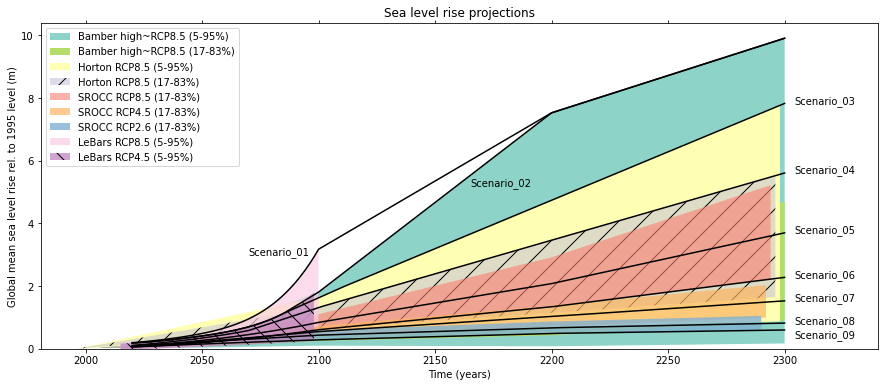

In [19]:
fig, ax1 = plt.subplots(figsize=(15,6))

colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd']

def countdown(counter): #function to regulate 
    return counter - 2

#SEA LEVEL RISE SCENARIOS


ax1.fill_between(dct['Bamber_2019_high_5'].years,dct['Bamber_2019_high_5'].sealevel,dct['Bamber_2019_high_95'].sealevel,label='Bamber high~RCP8.5 (5-95%)',facecolor=colors[0],alpha=1)
ax1.fill_between(dct['Bamber_2019_high_17'].years,dct['Bamber_2019_high_17'].sealevel,dct['Bamber_2019_high_83'].sealevel,label='Bamber high~RCP8.5 (17-83%)',facecolor=colors[6],alpha=1)

counter = 0

counter = countdown(counter)
ax1.fill_between(dct['Horton_2020_rcp85_5'].years[:counter],dct['Horton_2020_rcp85_5'].sealevel[:counter],dct['Horton_2020_rcp85_95'].sealevel[:counter],label='Horton RCP8.5 (5-95%)',facecolor=colors[1],alpha=1)
counter = countdown(counter)
ax1.fill_between(dct['Horton_2020_rcp85_17'].years[:counter],dct['Horton_2020_rcp85_17'].sealevel[:counter],dct['Horton_2020_rcp85_83'].sealevel[:counter],label='Horton RCP8.5 (17-83%)',facecolor=colors[2],alpha=0.5,hatch="/")
counter = countdown(counter)

ax1.fill_between(dct['SROCC_2019_RCP85_17'].years[:counter],dct['SROCC_2019_RCP85_17'].sealevel[:counter],dct['SROCC_2019_RCP85_83'].sealevel[:counter],label='SROCC RCP8.5 (17-83%)',facecolor=colors[3],alpha=.6)
counter = countdown(counter)
ax1.fill_between(dct['SROCC_2019_RCP45_17'].years[:counter],dct['SROCC_2019_RCP45_17'].sealevel[:counter],dct['SROCC_2019_RCP45_83'].sealevel[:counter],label='SROCC RCP4.5 (17-83%)',facecolor=colors[5],alpha=.7)
counter = countdown(counter)
ax1.fill_between(dct['SROCC_2019_RCP26_17'].years[:counter],dct['SROCC_2019_RCP26_17'].sealevel[:counter],dct['SROCC_2019_RCP26_83'].sealevel[:counter],label='SROCC RCP2.6 (17-83%)',facecolor=colors[4],alpha=.8)

ax1.fill_between(dct['LeBars_2017_RCP85_05'].years,dct['LeBars_2017_RCP85_05'].sealevel,dct['LeBars_2017_RCP85_95'].sealevel,label='LeBars RCP8.5 (5-95%)',facecolor=colors[-3],alpha=0.7)
ax1.fill_between(dct['LeBars_2017_RCP45_05'].years[:-2],dct['LeBars_2017_RCP45_05'].sealevel[:-2],dct['LeBars_2017_RCP45_95'].sealevel[:-2],label='LeBars RCP4.5 (5-95%)',facecolor=colors[-1],alpha=.7,hatch='\\')


plt.plot(scen1.years,scen1.sealevel,color='black')
ax1.text(2070,3,scen1.name)

plt.plot(scen2.years,scen2.sealevel,color='black')
ax1.text(2165,5.2,scen2.name)

for scen in new_scens[2:8]:
    plt.plot(scen.years,scen.sealevel,color='black')
    ax1.text(2304,scen.sealevel[-1],scen.name)

plt.plot(scen9.years,scen9.sealevel,color='black')
ax1.text(2304,0.35,scen9.name)


ax1.legend(loc='upper left')
ax1.tick_params(axis='x',reset=True)
ax1.set_title('Sea level rise projections')
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Global mean sea level rise rel. to 1995 level (m)')
ax1.set_xlim(right=2340)
ax1.set_ylim(bottom=0)


fig.savefig(os.path.join('..','Visualisations','New_waterlevel_scenarios_till2300.png'),bbox_inches='tight',dpi=150)

# Detail

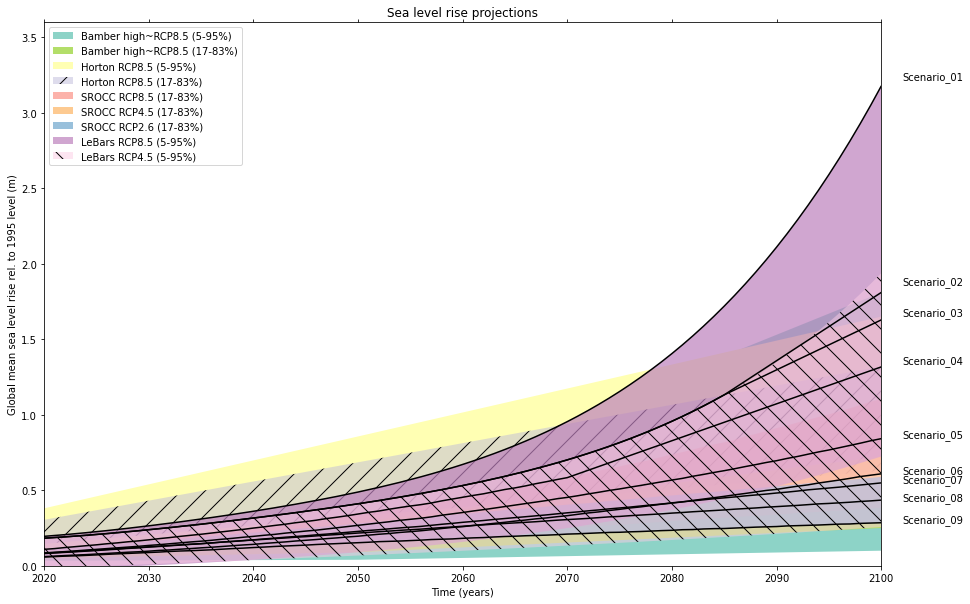

In [20]:
fig, ax1 = plt.subplots(figsize=(15,10))

colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd']

def countdown(counter): #function to regulate 
    return counter - 2

#SEA LEVEL RISE SCENARIOS


ax1.fill_between(dct['Bamber_2019_high_5'].years,dct['Bamber_2019_high_5'].sealevel,dct['Bamber_2019_high_95'].sealevel,label='Bamber high~RCP8.5 (5-95%)',facecolor=colors[0],alpha=1)
ax1.fill_between(dct['Bamber_2019_high_17'].years,dct['Bamber_2019_high_17'].sealevel,dct['Bamber_2019_high_83'].sealevel,label='Bamber high~RCP8.5 (17-83%)',facecolor=colors[6],alpha=1)



counter = countdown(counter)
ax1.fill_between(dct['Horton_2020_rcp85_5'].years[:counter],dct['Horton_2020_rcp85_5'].sealevel[:counter],dct['Horton_2020_rcp85_95'].sealevel[:counter],label='Horton RCP8.5 (5-95%)',facecolor=colors[1],alpha=1)
counter = countdown(counter)
ax1.fill_between(dct['Horton_2020_rcp85_17'].years[:counter],dct['Horton_2020_rcp85_17'].sealevel[:counter],dct['Horton_2020_rcp85_83'].sealevel[:counter],label='Horton RCP8.5 (17-83%)',facecolor=colors[2],alpha=0.5,hatch="/")
counter = countdown(counter)

ax1.fill_between(dct['SROCC_2019_RCP85_17'].years[:counter],dct['SROCC_2019_RCP85_17'].sealevel[:counter],dct['SROCC_2019_RCP85_83'].sealevel[:counter],label='SROCC RCP8.5 (17-83%)',facecolor=colors[3],alpha=.6)
counter = countdown(counter)
ax1.fill_between(dct['SROCC_2019_RCP45_17'].years[:counter],dct['SROCC_2019_RCP45_17'].sealevel[:counter],dct['SROCC_2019_RCP45_83'].sealevel[:counter],label='SROCC RCP4.5 (17-83%)',facecolor=colors[5],alpha=.7)
counter = countdown(counter)
ax1.fill_between(dct['SROCC_2019_RCP26_17'].years[:counter],dct['SROCC_2019_RCP26_17'].sealevel[:counter],dct['SROCC_2019_RCP26_83'].sealevel[:counter],label='SROCC RCP2.6 (17-83%)',facecolor=colors[4],alpha=.8)

ax1.fill_between(dct['LeBars_2017_RCP85_05'].years,dct['LeBars_2017_RCP85_05'].sealevel,dct['LeBars_2017_RCP85_95'].sealevel,label='LeBars RCP8.5 (5-95%)',facecolor=colors[-1],alpha=0.7)
ax1.fill_between(dct['LeBars_2017_RCP45_05'].years,dct['LeBars_2017_RCP45_05'].sealevel,dct['LeBars_2017_RCP45_95'].sealevel,label='LeBars RCP4.5 (5-95%)',facecolor=colors[-3],alpha=.5,hatch='\\')



for scen in new_scens:
    plt.plot(scen.years,scen.sealevel,color='black')
    ax1.text(2102,scen.sealevel[-200],scen.name)


ax1.legend(loc='upper left')
ax1.tick_params(axis='x',reset=True)
ax1.set_title('Sea level rise projections')
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Global mean sea level rise rel. to 1995 level (m)')
ax1.set_xlim(left=2020,right=2100)
ax1.set_ylim(bottom=0,top=3.6)


fig.savefig(os.path.join('..','Visualisations','New_waterlevel_scenarios_till2100.png'),bbox_inches='tight',dpi=150)

In [13]:
for scenario in new_scens:
    scenario.to_pickle('Transients')